# Beispiele

In [2]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs, make_moons
from scipy.spatial.distance import cdist

## k-means

### Aufgabe: k-means from Scratch
<div>
    <img src=attachment:8c7ba3dc-5511-4933-8993-a4270b252e8b.png width=180>
</div>

Der k-means Algorithmus ist so anschaulich, dass wir diesen Algorithmus "from Scratch" - also im Detail - nachprogrammieren können. Unsere Aufgabe in diesem Beispiel ist es also, den k-means Algorithmus Schritt für Schritt zu implementieren. Schreiben Sie also eine Funktion, die als Eingabeargumente die Daten und die Anzahl zu extrahierender Cluster aufnimmt - und uns die Centroids und Labels der Daten zurückgibt.
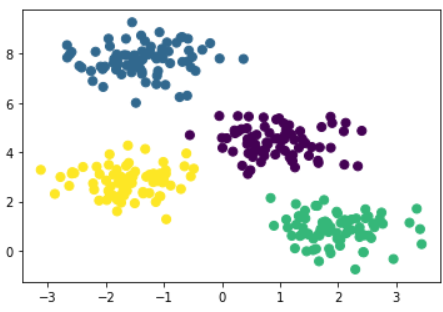

In [9]:
# Your Data
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# k-means from Scratch function
def find_clusters(X, n_clusters, threshold=0.0001):
    
    # 1. Randomly choose clusters
    initial_centroid_ind = np.random.permutation(X.shape[0])[:n_clusters]
    centroids = X[initial_centroid_ind, :]
    deviation = threshold + 1
    while deviation > threshold:
        
        # 2a. Assign labels based on closest center
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # 2b. Find new centers from means of points
        new_centroids = np.array([X[labels == cluster].mean(axis=0) for cluster in range(n_clusters)])
        
        # 2c. Check for convergence
        deviation = np.sum((new_centroids - centroids) ** 2)
        centroids = new_centroids
    
    return centroids, labels

# Execute function
centroids, labels = find_clusters(X, 4)

# Plot


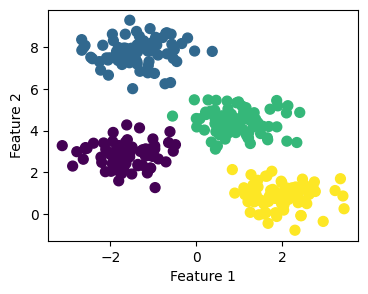

In [17]:
# Your Data
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# k-means from Scratch function
def find_clusters(X, num_clusters, threshold=0.0001):
    """
    
    """
    
    # 1. Randomly choose clusters
    initial_centroid_indices = np.random.permutation(X.shape[0])[:num_clusters]
    centroids = X[initial_centroid_indices]
    deviation = threshold + 1

    while deviation > threshold:

        # 2a. Assign labels based on closest center
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == n_cluster].mean(0)
                                for n_cluster in range(num_clusters)])

        # 2c. Check for convergence
        deviation = np.sum((new_centers - centroids) ** 2)
        centroids = new_centers
    return centroids, labels

# Execute function
centroids, labels = find_clusters(X, 4)

# Plot
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

### Aufgabe: Cluster-Validierung mittels Elbow-Plot
<div>
    <img src=attachment:8416dcf4-8a03-4100-9575-cbc4ea474165.png width=300>
</div>
In unserem selbst erzeugten Beispiel stecken vier Cluster. Wir wollen nun mittels der Elbow-Plot-Methode validieren, dass auch wirklich ein Clustering, das vier Cluster extrahiert, die Struktur der Daten am besten repräsentiert. Unsere Aufgabe ist also mittels eines `for`-Loops k-means mit ansteigendem $k$ an unseren Daten zu trainieren und die Sum of Squared Distanzes eines jeden Trainingsdurchgangs in einem Linienplot darzustellen.
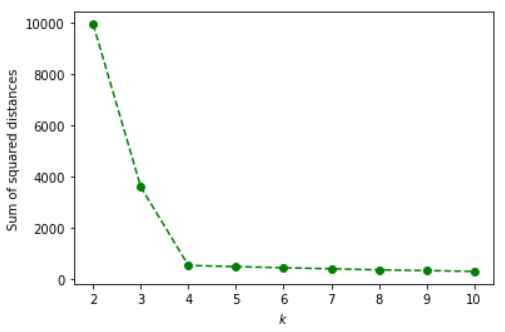

Text(0, 0.5, 'SSE')

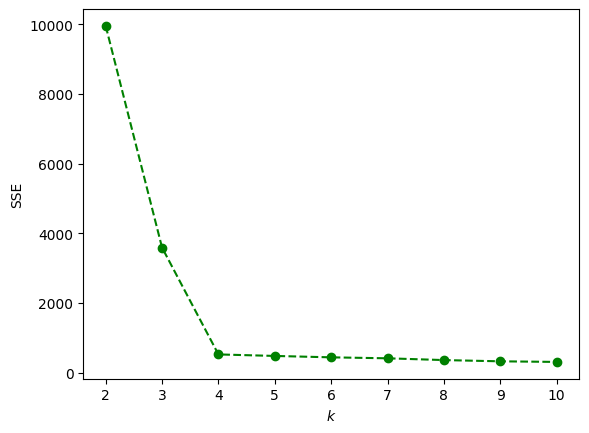

In [5]:
# Your Data
X, y_true = make_blobs(n_samples=3000, centers=4,
                       cluster_std=0.30, random_state=0)

# Loop over certain number of extracted clusters
sse = []
for cluster_size in np.arange(2, 11):
    model = KMeans(cluster_size).fit(X)
    sse.append(model.inertia_)

# Elbow Plot
plt.plot(range(2, 11), sse, 'go--')
plt.xlabel('$k$')
plt.ylabel('SSE')

## Beispiel: Bestimmung des Betriebszustandes von alten Brownfield-Maschinen

<div>
    <img src=attachment:c946fa84-27b7-4c51-b38c-12a9ee1c02dd.png width=100>
</div>

Im Maschinenbau gibt es den sog. _Weihenstephaner Standard_, in dem verschiedene Maschinenzustände kodiert sind. Beispielsweise gibt es die Zuordnungen:
* `   4`: Prepared
* `   8`: Mangel
* `  16`: Stau
* ` 128`: Produktion
* `1024`: Eigenstörung
* `4096`: Fremdstörung

Bei neueren Maschinen gibt es in der Maschine Schnittstellen, die diese Zustände ausgeben können. Bei älteren Maschinen, die schon lange im Feld sind und bei denen Neuerungen zugekauft werden müssen (sog. _Retrofits_ im _Brownfield_), könnte es passieren, dass diese keine Betriebszustandsangaben machen können. Für moderne Funktionalitäten sind diese jedoch essentiell. Daher könnte es für ein Maschinenbauunternehmen von Interesse sein auch bei älteren Maschinen datengetrieben Betriebszustände zu bestimmen.

Hierzu wollen wir das $k$-means Clustering nutzen. Uns liegen Maschinendaten in Form von kurzzeitigen (1-minütigen) _Snapshots_ eines Vibrations- und eines Temperatursensors am Motor einer Maschine vor. Wie können wir diese Daten und unser Clustering nutzen, um nach Betriebszuständen zu suchen? Nach was würden wir Ausschau halten? Haben wir einen Anhaltspunkt für $k$?
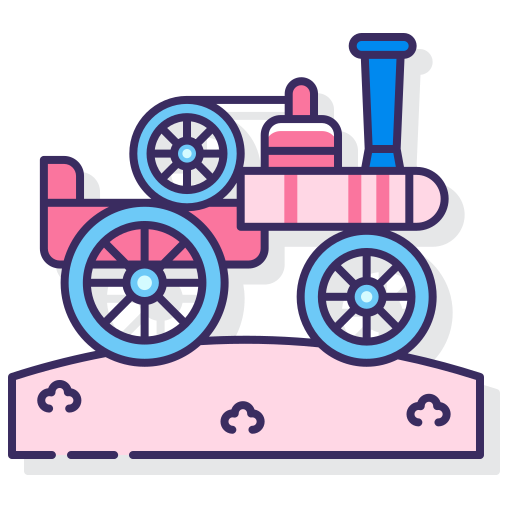

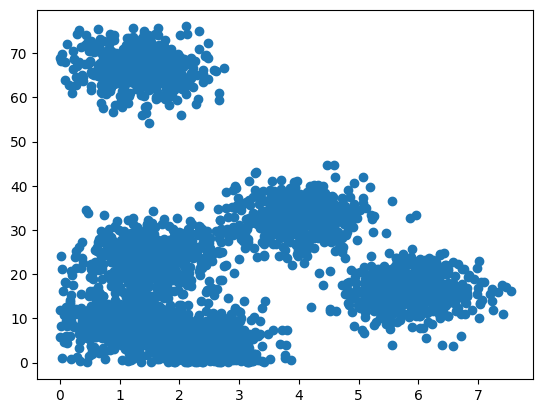

In [15]:
# Load
X = np.load('./../res/data/machine_state.npy')

# Look
plt.scatter(X[:, 0], X[:, 1])

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Text(0, 0.5, 'SSE')

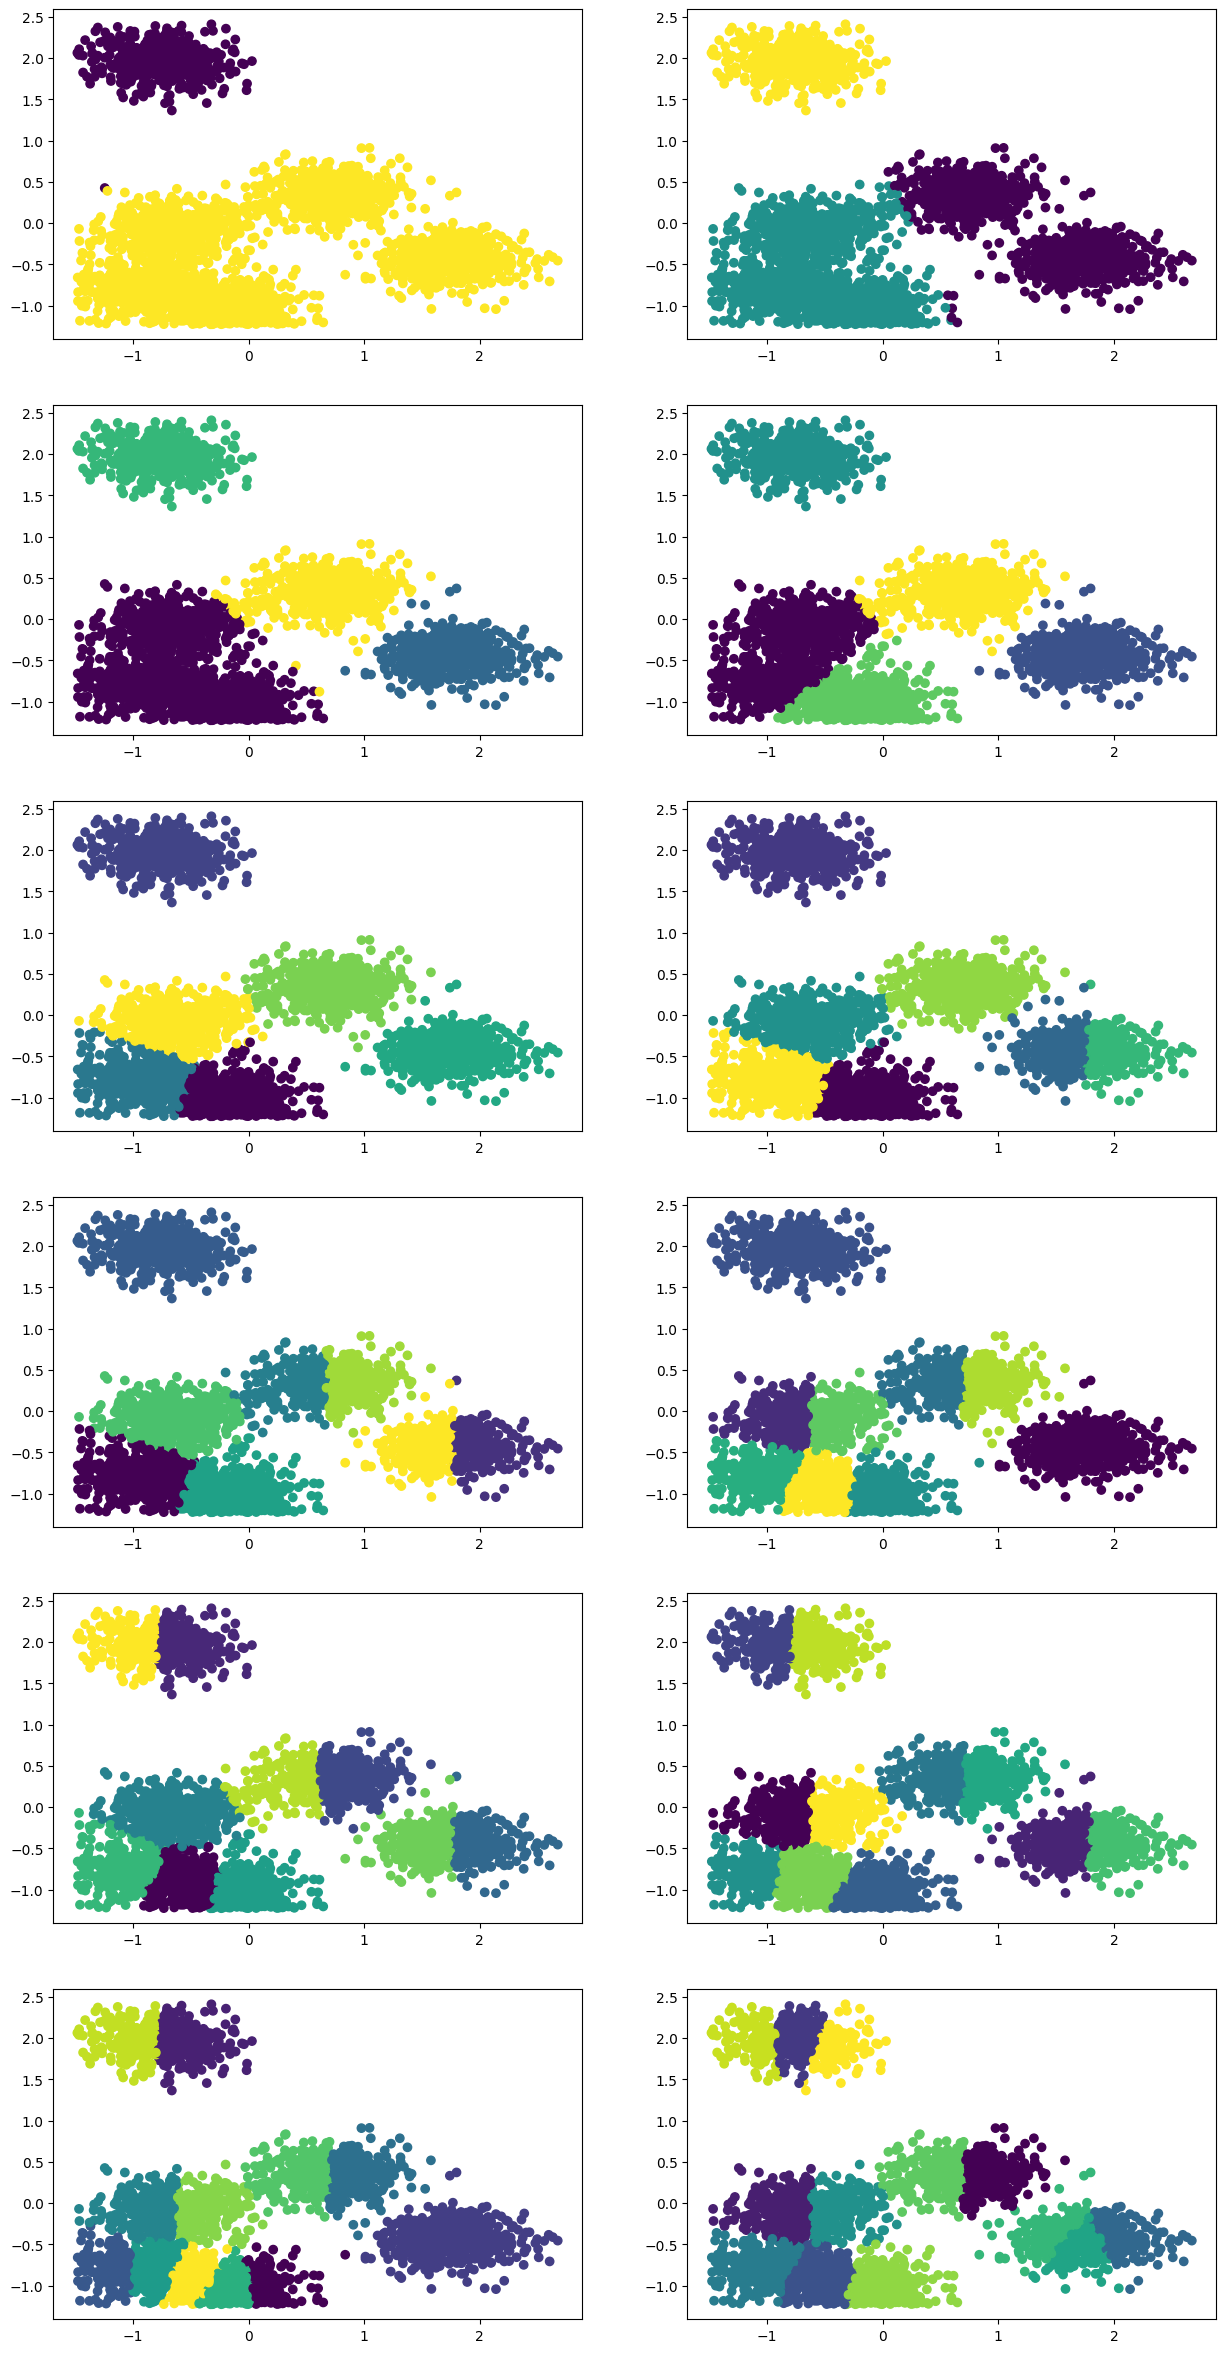

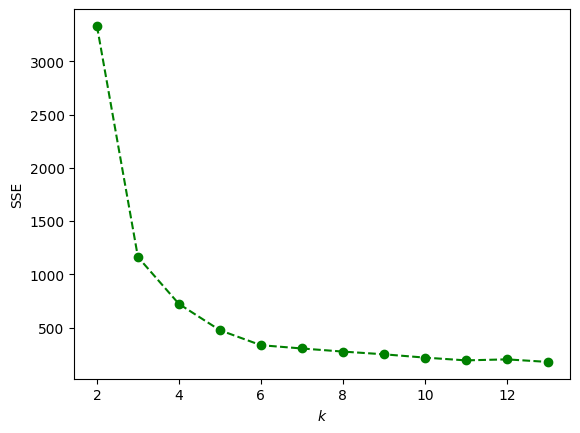

In [16]:
# Elbow Plot
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
sse = []
for cluster_size in np.arange(2, 14):
    model = KMeans(cluster_size).fit(X)
    sse.append(model.inertia_)
    labels = model.predict(X)
    ax.flat[cluster_size - 2].scatter(X[:, 0], X[:, 1], c=labels)

# Elbow Plot
plt.figure()
plt.plot(range(2, 14), sse, 'go--')
plt.xlabel('$k$')
plt.ylabel('SSE')

In [3]:
# Silhouette scores and plot


In [4]:
# Plot silhouette scores


## Beispiel: Assign new points to DBSCAN Clusters
In diesem Beispiel sehen wir uns an wie unbekannte Datenpunkte zu einem, mittels DBSCAN geclusterten, Datensatz hinzugefügt werden. Hierzu nutzen wir den $k$-Nearest-Neighbors Klassifikator. Dies ist ein intuitiver Klassifikator, den wir hier _on-the-fly_ betrachten. Er befindet sich in `sklearn.neighbors` und heißt `KNeighborsClassifier`. Die Klassifizierung eines neuen Datenpunktes geschieht einfach über ein _Majoritätsvotum_ der $k$ nächsten Nachbarn. D.h. das Lernen dieses Klassifikators besteht nur aus dem Abspeichern des Datensatzes und dessen Labels! Die Labels erhalten wir also aus dem Training des DBSCAN-Algorithmus auf den vorliegenden Datensatz.

### Code aus Folien

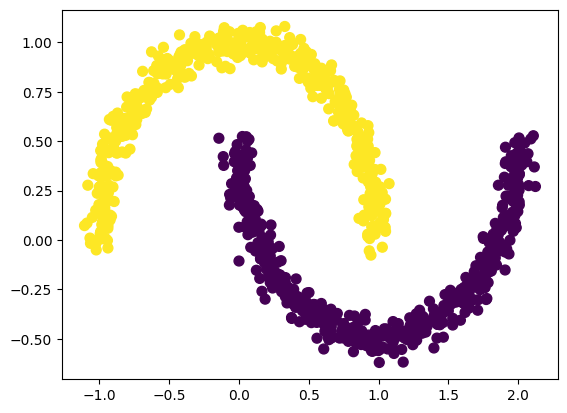

In [23]:
# Make data
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Fit DBSCAN with certain hyperparameter values
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

# Plot again
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_,
            s=50, cmap='viridis');

In [26]:
# Fit kNN on our data
knn = SVC(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [28]:
# Assign new data points
knn.predict([[0, -0.5]])

array([0])

# Quellen

<div>
    <img src=attachment:87560295-1b17-4a34-9502-5a554cd0d9f0.png width=100>
</div>
<div>Icons made by <a href="https://www.flaticon.com/authors/flat-icons" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
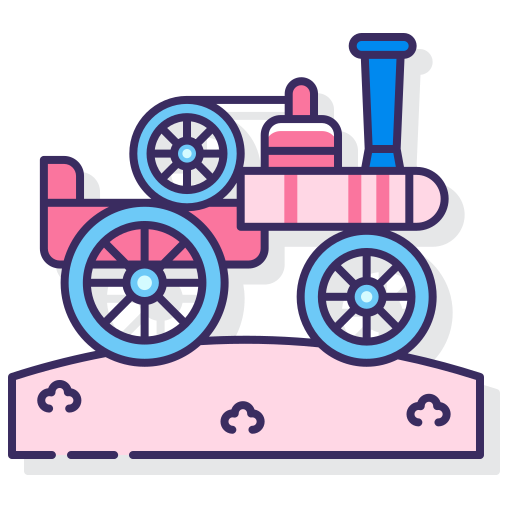